In [23]:
import random 
import matplotlib.pyplot as plt

In [11]:
contador = 0

In [12]:
class Node:
    def __init__(self, d):
        self.sons = list()
        self.keys = list()
        self.leaf = 1
        self.n = 0
        for k in range(2*d):
            self.keys.append(None)
        for k in range(2*d + 1):
            self.sons.append(None)

In [131]:
class BTree:
    def __init__(self,grade):
        self.d = grade
        self.root = None

    def createTree(self):
        if self.root == None:
            self.root = Node(self.d)
        return self.root

    def split_b_tree(self, x, i):
        global contador 
        z = Node(self.d)
        y = x.sons[i]
        z.leaf = y.leaf
        z.n = self.d-1
        for j in range(1, self.d):
            z.keys[j] = y.keys[j+self.d]
            y.keys[j+self.d] = None
        if y.leaf == 0:
            for j in range(1, self.d+1):
                z.sons[j] = y.sons[j + self.d]
                y.sons[j + self.d] = None

        y.n = self.d - 1
        for j in range(x.n + 1, i, -1):
            x.sons[j+1] = x.sons[j]
        x.sons[i+1] = z

        for j in range (x.n, i-1, -1):
            x.keys[j+1] = x.keys[j]

        x.keys[i] = y.keys[self.d]
        y.keys[self.d] = None
        x.n = x.n + 1
        contador += 1

    def insert_non_full_b_tree(self, x, k):
        global contador 
        i = x.n
        if x.leaf == 1:
            while i >= 1 and k < x.keys[i]:
                x.keys[i+1] = x.keys[i]
                i -= 1
            x.keys[i+1] = k
            x.n = x.n + 1
        else:
            while i >= 1 and k < x.keys[i]:
                i -= 1
            i += 1
            if x.sons[i].n == 2*self.d - 1:
                self.split_b_tree(x, i)
                if k > x.keys[i]:
                    i += 1
            self.insert_non_full_b_tree(x.sons[i], k)

    def insert_b_tree(self, k):
        global contador 
        r = self.root
        # print("r.n " + str(r.n))
        if r.n == 2*self.d -1:
            s = Node(self.d)
            self.root = s
            s.leaf = 0
            s.n = 0
            s.sons[1] = r
            self.split_b_tree(s, 1)
            self.insert_non_full_b_tree(s, k)
        else:
            self.insert_non_full_b_tree(r, k)

In [94]:
def printTree(node,tab):
    print(("\t"*tab)+"")
    for i in range(1,len(node.keys)):
        if(node.keys[i]!=None):
            print(("-"*tab)+str(chr(node.keys[i])))
    print(("\t"*tab)+"")
    if(node.leaf != 1):
        for i in range(1,len(node.sons)):
            if(node.sons[i]!= None):
                printTree(node.sons[i],tab+1)

In [136]:
bt = BTree(2)
bt.createTree()
n = 10
for x in range(n):
    r = random.randint(65,90)
    bt.insert_b_tree(r)
    
printTree(bt.root,0)


U

	
-Q
	
		
--K
--K
--O
		
		
--S
		
	
-V
	
		
--U
--U
		
		
--V
		


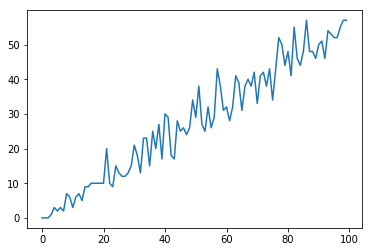

In [135]:
global contador 
bt = BTree(2)
bt.createTree()

x = []
y = []
n = 100
for i in range(n):
    x.append(i)
    contador = 0
    for j in range(i):
        r = random.randint(65,90)
        bt.insert_b_tree(r)
    y.append(contador)
        
    
plt.plot(x,y)
plt.show()